# Import libararies

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler,StandardScaler # For Scaling
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor # For KNN Algorithm - Regression Continuous Data
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import json

import warnings # For avoid warning message
warnings.filterwarnings("ignore")


In [2]:
df =  pd.read_csv(r'C:\Users\pc\Desktop\KNN Algorithm for Boston Data Set_Regression\Boston Dataset.csv')
#target = df["PRICE"]
df

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  black       506 non-null    float64
 13  lstat       506 non-null    float64
 14  medv        506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [4]:
df.describe()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,379.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#Train Test Split

In [5]:
x = df.drop("medv",axis = 1)
y= df["medv"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)

#Model Training

In [6]:
knn_reg = KNeighborsRegressor()
knn_reg.fit(x_train,y_train)

KNeighborsRegressor()

#Evaluation

In [7]:
y_pred = knn_reg.predict(x_test)
y_pred[40:45] # Y predicted


array([21.38, 33.66, 38.06, 21.82, 28.8 ])

In [8]:
y_test[40:45]

496    19.7
307    28.2
204    50.0
68     17.4
90     22.6
Name: medv, dtype: float64

In [9]:
x_test.head(3)

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
173,174,0.09178,0.0,4.05,0,0.510,6.416,84.1,2.6463,5,296,16.6,395.50,9.04
274,275,0.05644,40.0,6.41,1,0.447,6.758,32.9,4.0776,4,254,17.6,396.90,3.53
491,492,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711,20.1,390.11,18.07


#Testing data Accuracy

In [10]:
#Testing data Accuracy
y_pred = knn_reg.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
print("MSE:",mse)
rmse = np.sqrt(mse)
print("RMSE:",rmse)
mae = mean_absolute_error(y_test,y_pred)
print("MAE :",mae)
r2_value = r2_score(y_test,y_pred)
print("R-Squared value:",r2_value)

MSE: 25.20848421052631
RMSE: 5.020805135685542
MAE : 3.7239473684210522
R-Squared value: 0.6616905522658597


#Training data Accuracy

In [11]:

y_pred_train = knn_reg.predict(x_train)
mse = mean_squared_error(y_train,y_pred_train)
print("MSE:",mse)
rmse = np.sqrt(mse)
print("RMSE:",rmse)
mae = mean_absolute_error(y_train,y_pred_train)
print("MAE :",mae)
r2_value = r2_score(y_train,y_pred_train)
print("R-Squared value:",r2_value)

MSE: 26.558253107344633
RMSE: 5.153470006446591
MAE : 3.5602259887005654
R-Squared value: 0.6978463963877217


#STAGE 2
Train the model by Best values of K and p
Insted of Hyperparametric Tunning , We use another alternate method to find out "K" value
Prefer Hyperparametric Tunning , this method is only for Information

In [12]:
r2_train_list = [] # For Trainig Data
k_values = range(2,21) # It take 2 , 3 ,4, 5 ,...., 29 ,20.
for k in k_values:
 knn_reg = KNeighborsRegressor(n_neighbors=k , p=1)
 knn_reg.fit(x_train,y_train)
 r2_train = knn_reg.score(x_train,y_train)
 r2_train_list.append(r2_train)

r2_train_list


[0.8741444397981477,
 0.8075700653055002,
 0.7664887266266859,
 0.7358565484866151,
 0.7260733146141776,
 0.7076389107823038,
 0.6789873757618072,
 0.6687199958586139,
 0.6508360078369462,
 0.6317420950653962,
 0.6107152343164421,
 0.5923801617339708,
 0.5775268957332989,
 0.5612939542125244,
 0.5521469325709714,
 0.5371306503398952,
 0.5259169597875777,
 0.5139720282212431,
 0.4990603215562571]

In [13]:
r2_test_list = [] # For Testing Data
k_values = range(2,21)
for k in k_values:
 knn_reg = KNeighborsRegressor(n_neighbors=k , p=1)
 knn_reg.fit(x_train,y_train)
 r2_test = knn_reg.score(x_test,y_test)
 r2_test_list.append(r2_test)

r2_test_list


[0.7086358590595213,
 0.7147424380289154,
 0.7371062166190461,
 0.7277904486290545,
 0.7086469937245926,
 0.6907256131486774,
 0.6671630929329196,
 0.6606840696699938,
 0.644587244652286,
 0.6287053078917607,
 0.6079981502902309,
 0.5874475702247887,
 0.5768148346643116,
 0.564414986762476,
 0.5525563846568061,
 0.5465097449758609,
 0.53286585932075,
 0.5262459625809348,
 0.5217076897236176]

In [14]:
r2_train_list = []
r2_test_list = []
k_values = range(2,21)
for k in k_values:
 knn_reg = KNeighborsRegressor(n_neighbors=k , p=1)
 knn_reg.fit(x_train,y_train)
 r2_train = knn_reg.score(x_train,y_train)
 r2_train_list.append(r2_train)

 r2_test = knn_reg.score(x_test,y_test)
 r2_test_list.append(r2_test)


print("r2_train_list:\n", r2_train_list)
print("*"*80)
print("r2_test_list:\n", r2_test_list)

r2_train_list:
 [0.8741444397981477, 0.8075700653055002, 0.7664887266266859, 0.7358565484866151, 0.7260733146141776, 0.7076389107823038, 0.6789873757618072, 0.6687199958586139, 0.6508360078369462, 0.6317420950653962, 0.6107152343164421, 0.5923801617339708, 0.5775268957332989, 0.5612939542125244, 0.5521469325709714, 0.5371306503398952, 0.5259169597875777, 0.5139720282212431, 0.4990603215562571]
********************************************************************************
r2_test_list:
 [0.7086358590595213, 0.7147424380289154, 0.7371062166190461, 0.7277904486290545, 0.7086469937245926, 0.6907256131486774, 0.6671630929329196, 0.6606840696699938, 0.644587244652286, 0.6287053078917607, 0.6079981502902309, 0.5874475702247887, 0.5768148346643116, 0.564414986762476, 0.5525563846568061, 0.5465097449758609, 0.53286585932075, 0.5262459625809348, 0.5217076897236176]


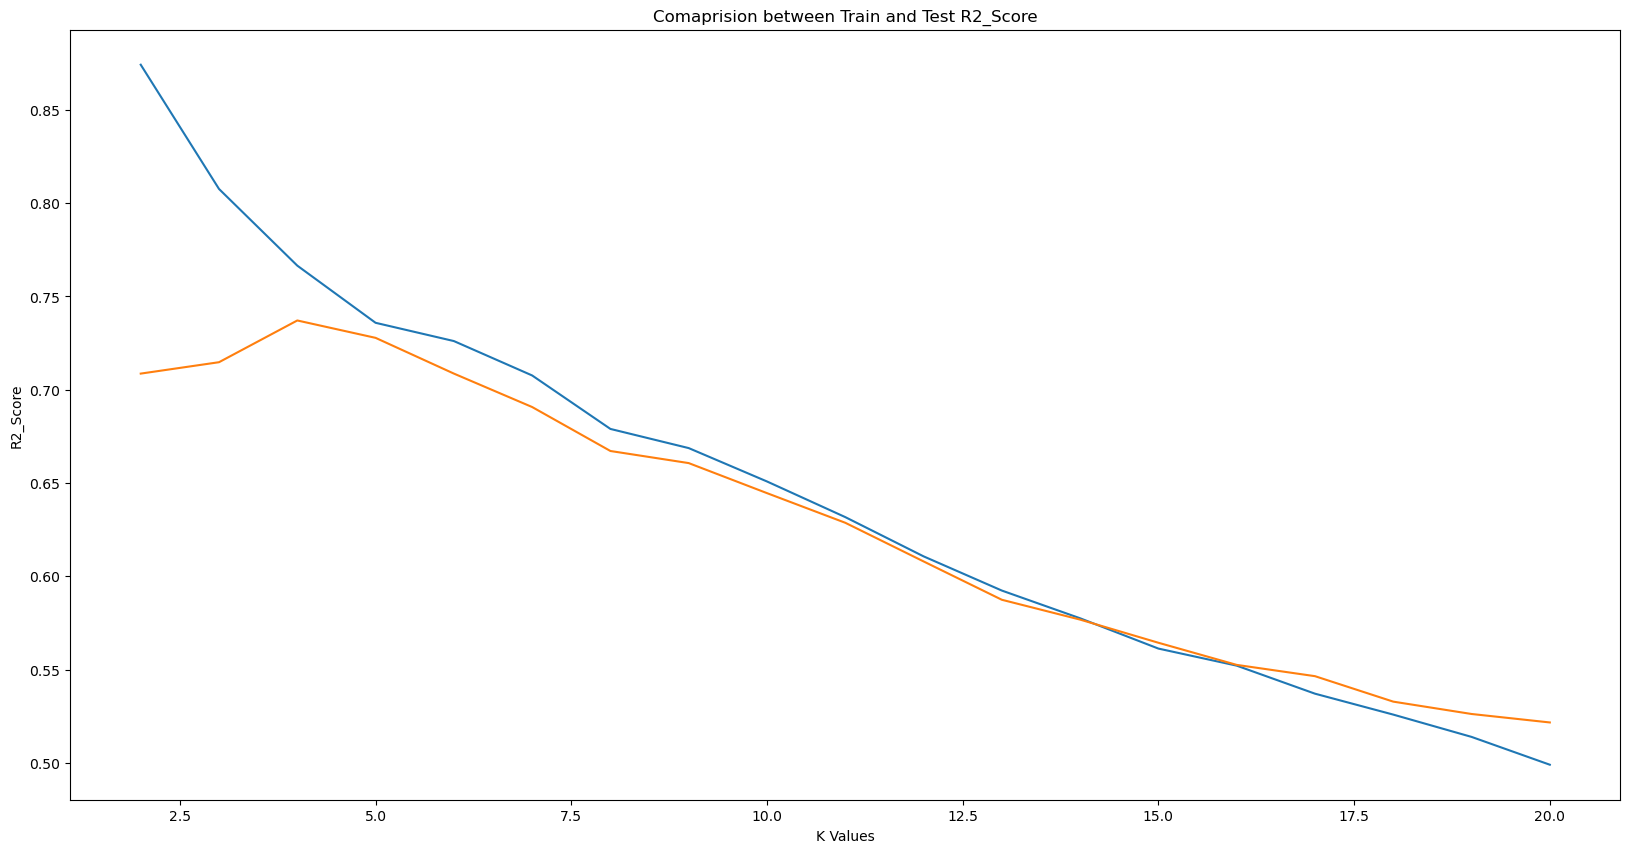

In [15]:
plt.figure(figsize = (20,10))
plt.plot(k_values,r2_train_list)
plt.plot(k_values,r2_test_list)
plt.xlabel("K Values")
plt.ylabel("R2_Score")
plt.title("Comaprision between Train and Test R2_Score")
plt.savefig("K values comaprision.jpeg")

Take k value manually, as per graph
k=4, p=1

Model Train

In [16]:
knn_reg = KNeighborsRegressor(n_neighbors=4,p=1)
knn_reg.fit(x_train,y_train)


KNeighborsRegressor(n_neighbors=4, p=1)

Evaluation

#Testing data Accuracy

In [17]:

y_pred = knn_reg.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
print("MSE:",mse)
rmse = np.sqrt(mse)
print("RMSE:",rmse)
mae = mean_absolute_error(y_test,y_pred)
print("MAE :",mae)
r2_value = r2_score(y_test,y_pred)
print("R-Squared value:",r2_value)

MSE: 19.589029605263157
RMSE: 4.4259495710257655
MAE : 3.38125
R-Squared value: 0.7371062166190461


#Training data Accuracy

In [18]:

y_pred_train = knn_reg.predict(x_train)
mse = mean_squared_error(y_train,y_pred_train)
print("MSE:",mse)
rmse = np.sqrt(mse)
print("RMSE:",rmse)
mae = mean_absolute_error(y_train,y_pred_train)
print("MAE :",mae)
r2_value = r2_score(y_train,y_pred_train)
print("R-Squared value:",r2_value)

MSE: 20.524830508474572
RMSE: 4.530433810185794
MAE : 3.0388418079096047
R-Squared value: 0.7664887266266859


Feature Engineering

In [19]:
x = df.drop("medv",axis = 1)
y= df["medv"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)

# STAGE 3
Normalization >> only on training data
Train the model by Default values of K and p


In [20]:
x_train.describe()


,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,253.177966,3.469887,11.403955,11.133051,0.073446,0.557259,6.325672,68.799718,3.765874,9.437853,407.042373,18.277966,359.701808,12.421130
std,141.166747,8.315831,22.608457,6.938651,0.261237,0.116792,0.719211,27.665360,2.126032,8.639971,166.522237,2.256792,86.924779,7.112402
min,2.000000,0.009060,0.000000,1.210000,0.000000,0.385000,3.863000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,136.250000,0.082320,0.000000,5.130000,0.000000,0.450000,5.889500,46.025000,2.073700,4.000000,279.000000,16.650000,376.782500,6.862500
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.227500,77.350000,3.107300,5.000000,330.000000,18.600000,391.600000,10.925000
75%,370.750000,3.281688,20.000000,18.100000,0.000000,0.631000,6.681750,93.475000,5.400700,24.000000,666.000000,20.200000,396.172500,16.225000
max,506.000000,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [21]:
normal_scalar = MinMaxScaler()
normal_scalar.fit(x_train) # we are storing maximun and minimun values
array = normal_scalar.transform(x_train)
normal_train_xdf = pd.DataFrame(array,columns = x_train.columns)
normal_train_xdf

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.007937,0.000234,0.000000,0.036562,0.0,0.150206,0.522066,0.574665,0.448545,0.086957,0.066794,0.648936,0.992990,0.096026
1,0.228175,0.001377,0.000000,0.331700,0.0,0.333333,0.470409,0.716787,0.145541,0.217391,0.467557,0.553191,0.990922,0.284492
2,0.087302,0.001825,0.000000,0.214851,0.0,0.129630,0.369941,0.318229,0.361084,0.086957,0.087786,0.563830,1.000000,0.233996
3,0.029762,0.011744,0.000000,0.261214,0.0,0.314815,0.421395,0.271885,0.306359,0.130435,0.229008,0.893617,0.974658,0.133830
4,0.926587,0.174971,0.000000,0.636638,0.0,0.401235,0.419565,0.701339,0.161755,1.000000,0.914122,0.808511,0.928993,0.452539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,0.208333,0.001822,0.000000,0.277045,0.0,0.277778,0.401261,0.916581,0.098337,0.173913,0.375954,0.882979,0.996898,0.467163
350,0.533730,0.003261,0.210526,0.216736,0.0,0.162551,0.405328,0.403708,0.300030,0.086957,0.068702,0.638298,0.979197,0.310982
351,0.688492,0.000067,0.842105,0.030155,0.0,0.102881,0.563758,0.276004,0.656039,0.130435,0.177481,0.468085,0.984972,0.117550
352,0.861111,0.125342,0.000000,0.636638,0.0,0.730453,0.562538,0.944387,0.090489,1.000000,0.914122,0.808511,0.276186,0.594371


In [22]:
knn_reg = KNeighborsRegressor() # k=5, p=2
knn_reg.fit(normal_train_xdf,y_train)
#Training Data Accuracy
y_pred_train = knn_reg.predict(normal_train_xdf)
mse = mean_squared_error(y_train,y_pred_train)
print("MSE:",mse)
rmse = np.sqrt(mse)
print("RMSE:",rmse)
mae = mean_absolute_error(y_train,y_pred_train)
print("MAE :",mae)
r2_value = r2_score(y_train,y_pred_train)
print("R-Squared value:",r2_value)

MSE: 15.991926553672316
RMSE: 3.9989906918711773
MAE : 2.6392655367231637
R-Squared value: 0.81805963602483


In [23]:
array = normal_scalar.transform(x_test)
normal_test_xdf = pd.DataFrame(array,columns = x_test.columns)
normal_test_xdf

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.341270,0.000930,0.000000,0.107049,0.0,0.257202,0.519219,0.836251,0.137921,0.173913,0.208015,0.425532,0.996470,0.201711
1,0.541667,0.000533,0.421053,0.196005,1.0,0.127572,0.588774,0.308960,0.268076,0.130435,0.127863,0.531915,1.000000,0.049669
2,0.972222,0.001087,0.000000,1.000000,0.0,0.460905,0.431157,0.987642,0.067155,0.130435,1.000000,0.797872,0.982879,0.450883
3,0.140873,0.000928,0.000000,0.361855,0.0,0.057613,0.447834,0.050463,0.378079,0.130435,0.225191,0.702128,0.984896,0.104581
4,0.894841,0.057112,0.000000,0.636638,0.0,0.674897,0.495017,0.915551,0.112632,1.000000,0.914122,0.808511,0.970220,0.428808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,0.873016,0.109199,0.000000,0.636638,0.0,0.730453,0.517185,0.971164,0.085069,1.000000,0.914122,0.808511,0.972414,0.490894
148,0.043651,0.011008,0.000000,0.261214,0.0,0.314815,0.396583,1.000000,0.269676,0.130435,0.229008,0.893617,0.994049,0.500828
149,0.444444,0.005821,0.000000,0.188089,0.0,0.244856,0.988814,0.824923,0.160482,0.304348,0.229008,0.510638,0.962429,0.080022
150,0.857143,0.062630,0.000000,0.636638,0.0,0.674897,0.523287,0.875386,0.107867,1.000000,0.914122,0.808511,0.251828,0.399834


#Testing data Accuracy

In [24]:

y_pred = knn_reg.predict(normal_test_xdf)
mse = mean_squared_error(y_test,y_pred)
print("MSE:",mse)
rmse = np.sqrt(mse)
print("RMSE:",rmse)
mae = mean_absolute_error(y_test,y_pred)
print("MAE :",mae)
r2_value = r2_score(y_test,y_pred)
print("R-Squared value:",r2_value)

MSE: 21.818136842105265
RMSE: 4.6709888505652915
MAE : 2.8689473684210527
R-Squared value: 0.7071905726660737


#STAGE 4
Train the model by Best values of K and p

r2_train_list:
 [0.9188895267696581, 0.8939535932386382, 0.8622400945120092, 0.8289147081216097, 0.8057244430417956, 0.7770386339815811, 0.7547530278892403, 0.7407893291907013, 0.7181171619729928, 0.6900223937788315, 0.6863864189113444, 0.6855386475882024, 0.6769279153085193, 0.6773675935764201, 0.667614471233464, 0.6606005348531243, 0.6524146582466128, 0.6428726098830149, 0.6365810847919711]
********************************************************************************
r2_test_list:
 [0.8457300493108957, 0.8047140635048596, 0.7804326147702568, 0.7662141784554966, 0.7452827151097761, 0.7316601956737401, 0.7223189751975684, 0.7063440446843527, 0.6991347827739662, 0.6797261861212118, 0.6683420507072801, 0.6572123893492137, 0.6586416733718543, 0.658599671268957, 0.6518630169508353, 0.6491101435165891, 0.6442034927534765, 0.6381231531062017, 0.6329584891192507]


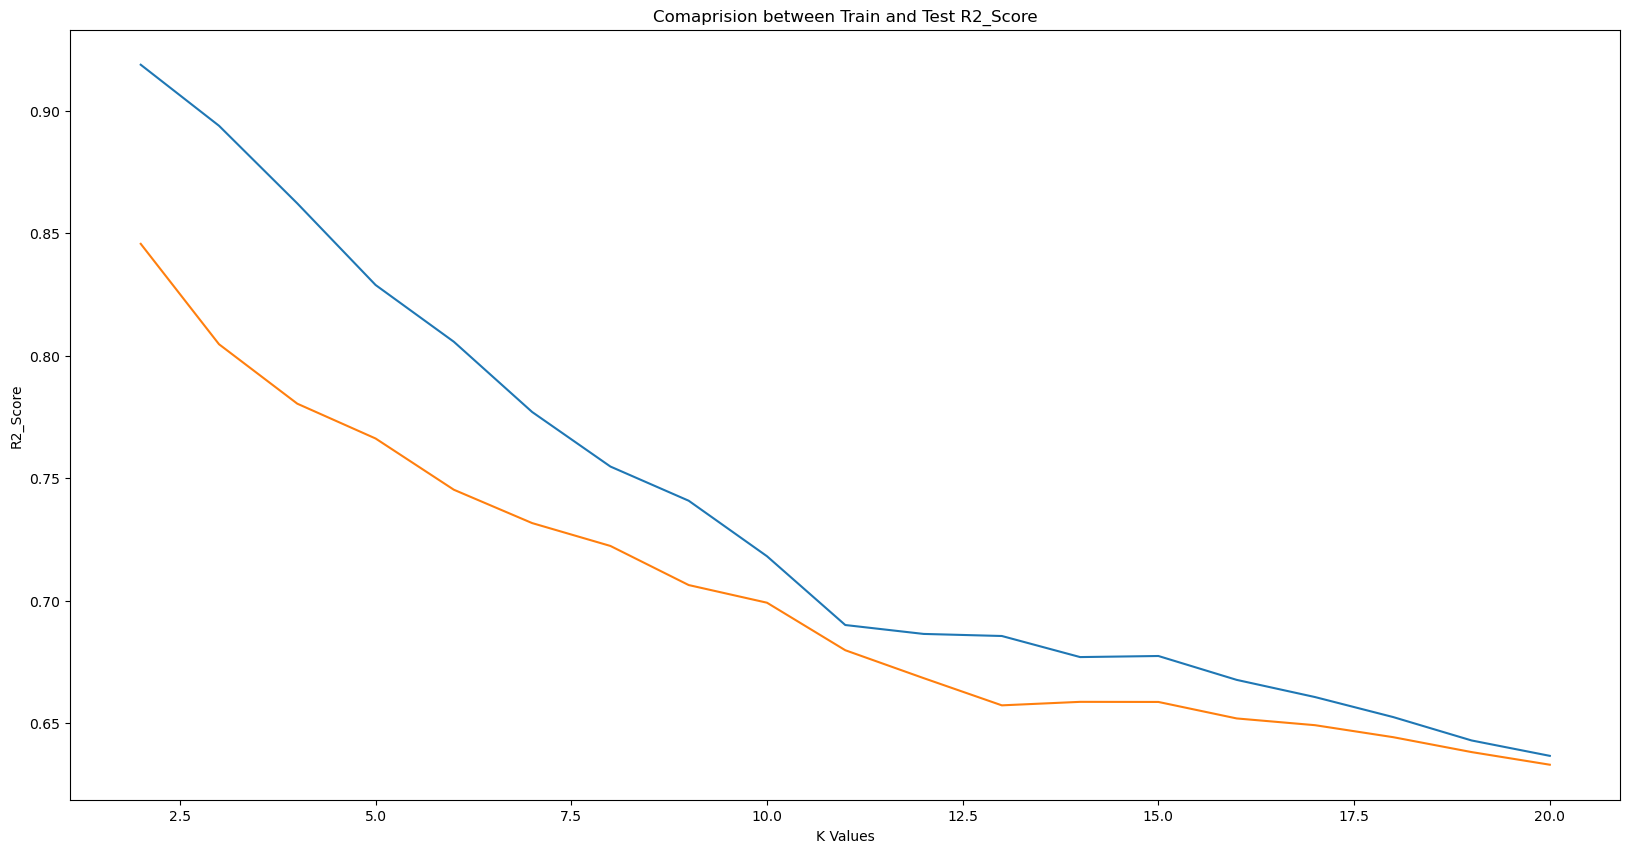

In [25]:
r2_train_list = []
r2_test_list = []
k_values = range(2,21)
for k in k_values:
 knn_reg = KNeighborsRegressor(n_neighbors=k , p=1)
 knn_reg.fit(normal_train_xdf,y_train)
 r2_train = knn_reg.score(normal_train_xdf,y_train)
 r2_train_list.append(r2_train)

 r2_test = knn_reg.score(normal_test_xdf,y_test)
 r2_test_list.append(r2_test)


print("r2_train_list:\n", r2_train_list)
print("*"*80)
print("r2_test_list:\n", r2_test_list)
plt.figure(figsize = (20,10))
plt.plot(k_values,r2_train_list)
plt.plot(k_values,r2_test_list)
plt.xlabel("K Values")
plt.ylabel("R2_Score")
plt.title("Comaprision between Train and Test R2_Score")
plt.savefig("K values comaprision.jpeg")


k=5 , p =1

In [26]:
knn_reg = KNeighborsRegressor(n_neighbors=5,p=1)
knn_reg.fit(normal_train_xdf,y_train)
#Training Data Accuracy
y_pred_train = knn_reg.predict(normal_train_xdf)
mse = mean_squared_error(y_train,y_pred_train)
print("MSE:",mse)
rmse = np.sqrt(mse)
print("RMSE:",rmse)
mae = mean_absolute_error(y_train,y_pred_train)
print("MAE :",mae)
r2_value = r2_score(y_train,y_pred_train)
print("R-Squared value:",r2_value)

MSE: 15.037803389830504
RMSE: 3.877860671791923
MAE : 2.602372881355932
R-Squared value: 0.8289147081216097


In [27]:
array = normal_scalar.transform(x_test)
normal_test_xdf = pd.DataFrame(array,columns = x_test.columns)
normal_test_xdf
#Testing data Accuracy
y_pred = knn_reg.predict(normal_test_xdf)
mse = mean_squared_error(y_test,y_pred)
print("MSE:",mse)
rmse = np.sqrt(mse)
print("RMSE:",rmse)
mae = mean_absolute_error(y_test,y_pred)
print("MAE :",mae)
r2_value = r2_score(y_test,y_pred)
print("R-Squared value:",r2_value)


MSE: 17.420105263157897
RMSE: 4.173739961132928
MAE : 2.710263157894737
R-Squared value: 0.7662141784554966


#STAGE 5
Standardization
Train the model by Default values of K and p

In [28]:
std_scalar = StandardScaler()
std_scalar.fit(x_train) # we are storing maximun and minimun values
array = std_scalar.transform(x_train)
std_train_xdf = pd.DataFrame(array,columns = x_train.columns)
std_train_xdf


,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,-1.753443,-0.414259,-0.505125,-1.292142,-0.281546,-0.851085,0.145264,-0.365584,1.081628,-0.746179,-1.112790,0.187271,0.396514,-1.015316
1,-0.966026,-0.402008,-0.505125,-0.162083,-0.281546,-0.087967,-0.208401,0.133941,-0.487876,-0.398464,0.150088,-0.212090,0.387067,-0.053663
2,-1.469689,-0.397211,-0.505125,-0.609489,-0.281546,-0.936828,-0.896237,-1.266900,0.628596,-0.746179,-1.046639,-0.167716,0.428541,-0.311324
3,-1.675411,-0.290936,-0.505125,-0.431970,-0.281546,-0.165136,-0.543965,-1.429789,0.345133,-0.630274,-0.601625,1.207859,0.312760,-0.822422
4,1.531009,1.457816,-0.505125,1.005500,-0.281546,0.194987,-0.556496,0.079645,-0.403892,1.687825,1.557294,0.852872,0.104124,0.803800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,-1.036964,-0.397237,-0.505125,-0.371354,-0.281546,-0.319475,-0.681810,0.836171,-0.732385,-0.514369,-0.138570,1.163486,0.414371,0.878423
350,0.126427,-0.381828,0.380752,-0.602272,-0.281546,-0.799639,-0.653963,-0.966462,0.312349,-0.746179,-1.106776,0.142897,0.333497,0.081504
351,0.679747,-0.416046,3.038382,-1.316677,-0.281546,-1.048295,0.430702,-1.415310,2.156415,-0.630274,-0.763995,-0.567077,0.359879,-0.905493
352,1.296912,0.926113,-0.505125,1.005500,-0.281546,1.566884,0.422348,0.933904,-0.773035,1.687825,1.557294,0.852872,-2.878413,1.527504


In [29]:
knn_reg = KNeighborsRegressor()
knn_reg.fit(std_train_xdf,y_train)
#Training Data Accuracy
y_pred_train = knn_reg.predict(std_train_xdf)
mse = mean_squared_error(y_train,y_pred_train)
print("MSE:",mse)
rmse = np.sqrt(mse)
print("RMSE:",rmse)
mae = mean_absolute_error(y_train,y_pred_train)
print("MAE :",mae)
r2_value = r2_score(y_train,y_pred_train)
print("R-Squared value:",r2_value)

MSE: 13.890862146892657
RMSE: 3.7270446934391135
MAE : 2.475649717514124
R-Squared value: 0.8419634741034875


In [30]:
array = std_scalar.transform(x_test)
std_test_xdf = pd.DataFrame(array,columns = x_test.columns)
#Testing data Accuracy
y_pred = knn_reg.predict(std_test_xdf)
mse = mean_squared_error(y_test,y_pred)
print("MSE:",mse)
rmse = np.sqrt(mse)
print("RMSE:",rmse)
mae = mean_absolute_error(y_test,y_pred)
print("MAE :",mae)
r2_value = r2_score(y_test,y_pred)
print("R-Squared value:",r2_value)

MSE: 19.465984210526315
RMSE: 4.412027222323806
MAE : 2.650526315789474
R-Squared value: 0.7387575423866726


#STAGE 6
Train the model by Best values of K and p

r2_train_list:
 [0.9297453348370839, 0.900293653613252, 0.8820851693727689, 0.8521662769494527, 0.8297839340913208, 0.7945517248365062, 0.7760783950190356, 0.7704626229244451, 0.7651247705473107, 0.7484627446600078, 0.7335649449733765, 0.7266625882100195, 0.7138854657398119, 0.7058069734230377, 0.7008290785750032, 0.696695995612157, 0.6920520240256381, 0.6872201957870349, 0.6859986557609542]
********************************************************************************
r2_test_list:
 [0.790498456228901, 0.7651557868467908, 0.7615333295816766, 0.7424130284038826, 0.732103146725021, 0.7484240400735731, 0.7355109367220676, 0.7288823508379907, 0.7266784310999265, 0.7245351325263987, 0.7147872219461403, 0.7038419982693911, 0.6939285496589226, 0.692839360865991, 0.6852405956929897, 0.6821141207577397, 0.6794210213338645, 0.6746804419334503, 0.6679635201652165]


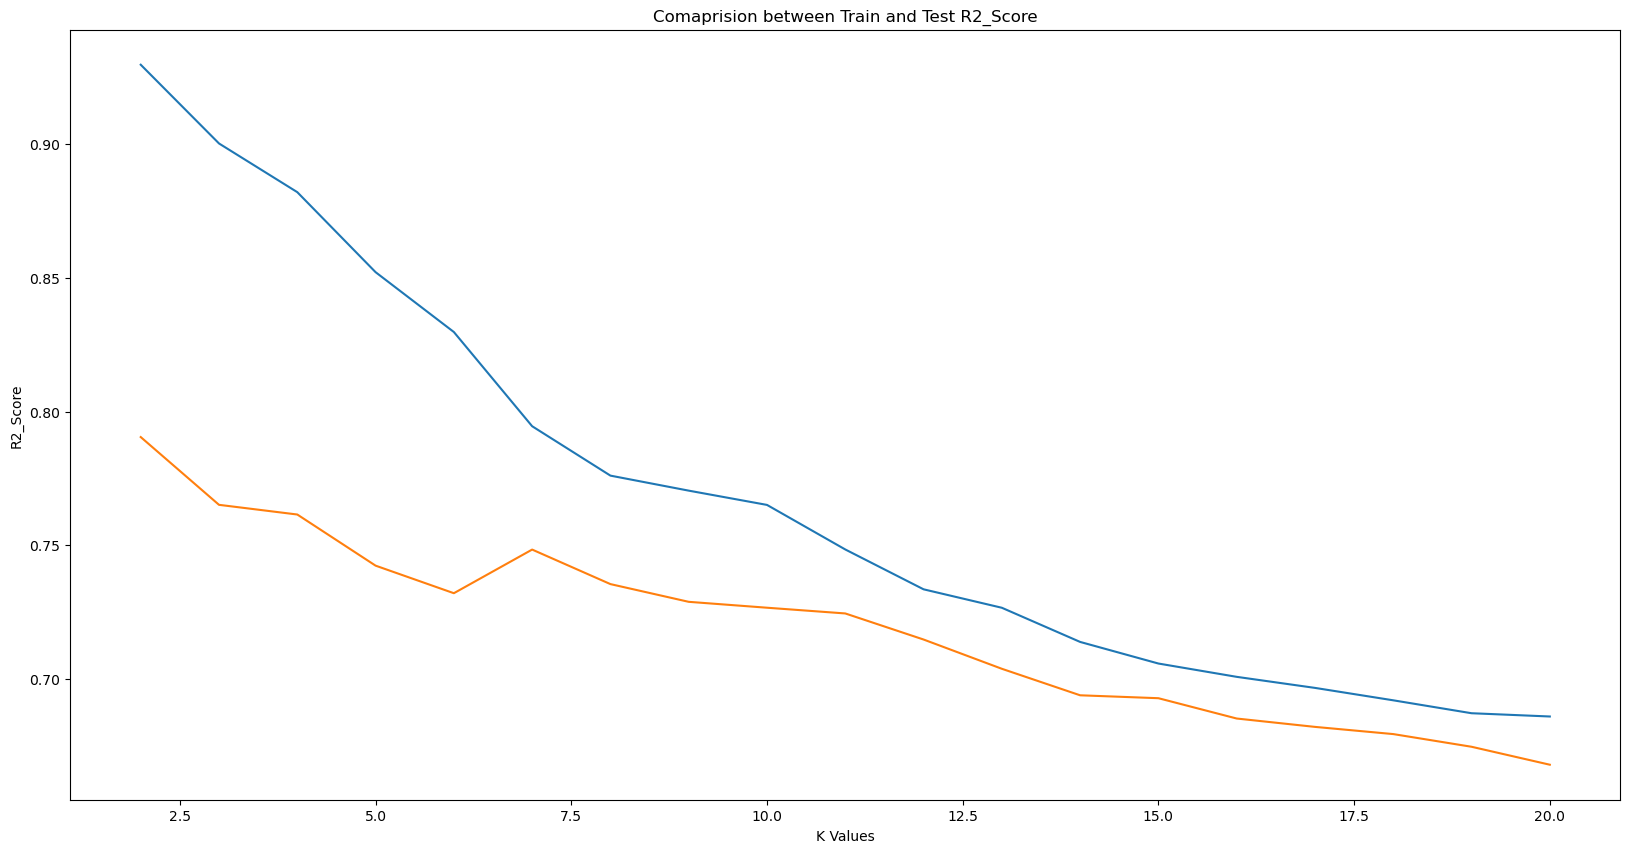

In [31]:
r2_train_list = []
r2_test_list = []
k_values = range(2,21)
for k in k_values:
 knn_reg = KNeighborsRegressor(n_neighbors=k , p=1)
 knn_reg.fit(std_train_xdf,y_train)
 r2_train = knn_reg.score(std_train_xdf,y_train)
 r2_train_list.append(r2_train)

 r2_test = knn_reg.score(std_test_xdf,y_test)
 r2_test_list.append(r2_test)


print("r2_train_list:\n", r2_train_list)
print("*"*80)
print("r2_test_list:\n", r2_test_list)
plt.figure(figsize = (20,10))
plt.plot(k_values,r2_train_list)
plt.plot(k_values,r2_test_list)
plt.xlabel("K Values")
plt.ylabel("R2_Score")
plt.title("Comaprision between Train and Test R2_Score")
plt.savefig("K values comaprision.jpeg")


k=8, p=1

In [32]:
knn_reg = KNeighborsRegressor(n_neighbors=7,p=1)
knn_reg.fit(std_train_xdf,y_train)
#Training Data Accuracy
y_pred_train = knn_reg.predict(std_train_xdf)
mse = mean_squared_error(y_train,y_pred_train)
print("MSE:",mse)
rmse = np.sqrt(mse)
print("RMSE:",rmse)
mae = mean_absolute_error(y_train,y_pred_train)
print("MAE :",mae)
r2_value = r2_score(y_train,y_pred_train)
print("R-Squared value:",r2_value)

MSE: 18.05819036089012
RMSE: 4.249492953387512
MAE : 2.748547215496368
R-Squared value: 0.7945517248365062


In [33]:
array = std_scalar.transform(x_test)
std_test_xdf = pd.DataFrame(array,columns = x_test.columns)
#Testing data Accuracy
y_pred = knn_reg.predict(std_test_xdf)
mse = mean_squared_error(y_test,y_pred)
print("MSE:",mse)
rmse = np.sqrt(mse)
print("RMSE:",rmse)
mae = mean_absolute_error(y_test,y_pred)
print("MAE :",mae)
r2_value = r2_score(y_test,y_pred)
print("R-Squared value:",r2_value)


MSE: 18.74570354457573
RMSE: 4.329630878559479
MAE : 2.731203007518797
R-Squared value: 0.7484240400735731


finally go for stdandardization

In [34]:
x_test.columns


Index(['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black', 'lstat'],
      dtype='object')

In [35]:
import pickle
file = open("expense_model.pkl", 'wb')
pickle.dump(knn_reg, file)